<a href="https://colab.research.google.com/github/chetna2/CB/blob/main/Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
data=pd.read_csv('/content/data.csv')

In [ ]:
data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [ ]:
data['Sentiment'].value_counts(normalize=True)*100

neutral     53.577542
positive    31.701472
negative    14.720986
Name: Sentiment, dtype: float64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


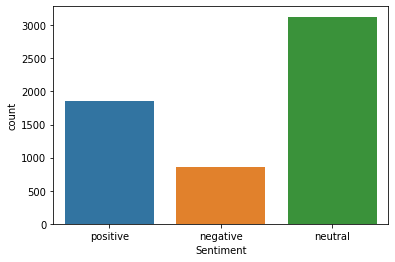

In [ ]:
sns.countplot(data['Sentiment'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [ ]:
data.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
data['Sentimentnew']=le.fit_transform(data['Sentiment'])

In [ ]:
data

,Sentence,Sentiment,Sentimentnew
0,The GeoSolutions technology will leverage Bene...,positive,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,0
2,"For the last quarter of 2010 , Componenta 's n...",positive,2
3,According to the Finnish-Russian Chamber of Co...,neutral,1
4,The Swedish buyout firm has sold its remaining...,neutral,1
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,0
5838,Nordic Walking was first used as a summer trai...,neutral,1
5839,"According shipping company Viking Line , the E...",neutral,1
5840,"In the building and home improvement trade , s...",neutral,1


In [ ]:
data=data.drop('Sentiment',axis=1)

In [ ]:
import string

In [ ]:
p=string.punctuation

In [ ]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [ ]:
#storing the puntuation free text
data['clean_msg']= data['Sentence'].apply(lambda x:remove_punctuation(x))
data.head()

,Sentence,Sentimentnew,clean_msg
0,The GeoSolutions technology will leverage Bene...,2,The GeoSolutions technology will leverage Bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,ESI on lows down 150 to 250 BK a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",2,For the last quarter of 2010 Componenta s net...
3,According to the Finnish-Russian Chamber of Co...,1,According to the FinnishRussian Chamber of Com...
4,The Swedish buyout firm has sold its remaining...,1,The Swedish buyout firm has sold its remaining...


In [ ]:
data['sen']=data['clean_msg'].apply(lambda x:x.lower())

In [ ]:
def tokenization(text):
    l=text.split(' ')
    return l

In [ ]:
data['sen1']=data['sen'].apply(lambda x:tokenization(x))

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def funstop(text):
    s=[i for i in text if i not in stopwords]
    return s

In [ ]:
data['sen2']=data['sen1'].apply(lambda x:funstop(x))

In [ ]:
data

,Sentence,Sentimentnew,clean_msg,sen,sen1
0,The GeoSolutions technology will leverage Bene...,2,The GeoSolutions technology will leverage Bene...,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,ESI on lows down 150 to 250 BK a real possibility,esi on lows down 150 to 250 bk a real possibility,"[esi, on, lows, down, 150, to, 250, bk, a, rea..."
2,"For the last quarter of 2010 , Componenta 's n...",2,For the last quarter of 2010 Componenta s net...,for the last quarter of 2010 componenta s net...,"[for, the, last, quarter, of, 2010, , componen..."
3,According to the Finnish-Russian Chamber of Co...,1,According to the FinnishRussian Chamber of Com...,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ..."
4,The Swedish buyout firm has sold its remaining...,1,The Swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r..."
...,...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,0,RISING costs have forced packaging producer Hu...,rising costs have forced packaging producer hu...,"[rising, costs, have, forced, packaging, produ..."
5838,Nordic Walking was first used as a summer trai...,1,Nordic Walking was first used as a summer trai...,nordic walking was first used as a summer trai...,"[nordic, walking, was, first, used, as, a, sum..."
5839,"According shipping company Viking Line , the E...",1,According shipping company Viking Line the EU...,according shipping company viking line the eu...,"[according, shipping, company, viking, line, ,..."
5840,"In the building and home improvement trade , s...",1,In the building and home improvement trade sa...,in the building and home improvement trade sa...,"[in, the, building, and, home, improvement, tr..."


In [ ]:
data['stemm']=data['sen2'].apply(lambda x:funcps(x))

In [ ]:
def funcps(text):
    stemm=[ps.stem(i) for i in text]
    return stemm

In [ ]:
ps=PorterStemmer()

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
wl=WordNetLemmatizer()

In [ ]:
def funwl(text):
    lemmword=" ".join([wl.lemmatize(i) for i in text])
    return lemmword

In [ ]:
data['lemm']=data['sen2'].apply(lambda x:funwl(x))

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
data

,Sentence,Sentimentnew,clean_msg,sen,sen1,sen2,stemm,lemm
0,The GeoSolutions technology will leverage Bene...,2,The GeoSolutions technology will leverage Bene...,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage...","[geosolutions, technology, leverage, benefon, ...","[geosolut, technolog, leverag, benefon, gp, so...",geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,ESI on lows down 150 to 250 BK a real possibility,esi on lows down 150 to 250 bk a real possibility,"[esi, on, lows, down, 150, to, 250, bk, a, rea...","[esi, lows, 150, 250, bk, real, possibility]","[esi, low, 150, 250, bk, real, possibl]",esi low 150 250 bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",2,For the last quarter of 2010 Componenta s net...,for the last quarter of 2010 componenta s net...,"[for, the, last, quarter, of, 2010, , componen...","[last, quarter, 2010, , componenta, net, sales...","[last, quarter, 2010, , componenta, net, sale,...",last quarter 2010 componenta net sale doubled...
3,According to the Finnish-Russian Chamber of Co...,1,According to the FinnishRussian Chamber of Com...,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ...","[according, finnishrussian, chamber, commerce,...","[accord, finnishrussian, chamber, commerc, , m...",according finnishrussian chamber commerce maj...
4,The Swedish buyout firm has sold its remaining...,1,The Swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r...","[swedish, buyout, firm, sold, remaining, 224, ...","[swedish, buyout, firm, sold, remain, 224, per...",swedish buyout firm sold remaining 224 percent...
...,...,...,...,...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,0,RISING costs have forced packaging producer Hu...,rising costs have forced packaging producer hu...,"[rising, costs, have, forced, packaging, produ...","[rising, costs, forced, packaging, producer, h...","[rise, cost, forc, packag, produc, huhtamaki, ...",rising cost forced packaging producer huhtamak...
5838,Nordic Walking was first used as a summer trai...,1,Nordic Walking was first used as a summer trai...,nordic walking was first used as a summer trai...,"[nordic, walking, was, first, used, as, a, sum...","[nordic, walking, first, used, summer, trainin...","[nordic, walk, first, use, summer, train, meth...",nordic walking first used summer training meth...
5839,"According shipping company Viking Line , the E...",1,According shipping company Viking Line the EU...,according shipping company viking line the eu...,"[according, shipping, company, viking, line, ,...","[according, shipping, company, viking, line, ,...","[accord, ship, compani, vike, line, , eu, deci...",according shipping company viking line eu dec...
5840,"In the building and home improvement trade , s...",1,In the building and home improvement trade sa...,in the building and home improvement trade sa...,"[in, the, building, and, home, improvement, tr...","[building, home, improvement, trade, , sales, ...","[build, home, improv, trade, , sale, decreas, ...",building home improvement trade sale decrease...


In [ ]:
data.drop('preprocessed',axis=1)

KeyError: ignored

In [ ]:
data

,Sentence,Sentimentnew,clean_msg,sen,sen1
0,The GeoSolutions technology will leverage Bene...,2,The GeoSolutions technology will leverage Bene...,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,ESI on lows down 150 to 250 BK a real possibility,esi on lows down 150 to 250 bk a real possibility,"[esi, on, lows, down, 150, to, 250, bk, a, rea..."
2,"For the last quarter of 2010 , Componenta 's n...",2,For the last quarter of 2010 Componenta s net...,for the last quarter of 2010 componenta s net...,"[for, the, last, quarter, of, 2010, , componen..."
3,According to the Finnish-Russian Chamber of Co...,1,According to the FinnishRussian Chamber of Com...,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ..."
4,The Swedish buyout firm has sold its remaining...,1,The Swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r..."
...,...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,0,RISING costs have forced packaging producer Hu...,rising costs have forced packaging producer hu...,"[rising, costs, have, forced, packaging, produ..."
5838,Nordic Walking was first used as a summer trai...,1,Nordic Walking was first used as a summer trai...,nordic walking was first used as a summer trai...,"[nordic, walking, was, first, used, as, a, sum..."
5839,"According shipping company Viking Line , the E...",1,According shipping company Viking Line the EU...,according shipping company viking line the eu...,"[according, shipping, company, viking, line, ,..."
5840,"In the building and home improvement trade , s...",1,In the building and home improvement trade sa...,in the building and home improvement trade sa...,"[in, the, building, and, home, improvement, tr..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer()

In [ ]:
mat=cv.fit_transform(data['lemm']).toarray()


In [ ]:
mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
v1=cv.vocabulary_

In [ ]:
v1

{'geosolutions': 5173,
 'technology': 10525,
 'leverage': 6807,
 'benefon': 2423,
 'gps': 5257,
 'solution': 9972,
 'providing': 8696,
 'location': 6912,
 'based': 2341,
 'search': 9570,
 'community': 3197,
 'platform': 8381,
 'relevant': 9045,
 'multimedia': 7528,
 'content': 3353,
 'new': 7661,
 'powerful': 8498,
 'commercial': 3178,
 'model': 7422,
 'esi': 4330,
 'low': 6975,
 '150': 353,
 '250': 734,
 'bk': 2508,
 'real': 8903,
 'possibility': 8473,
 'last': 6715,
 'quarter': 8783,
 '2010': 603,
 'componenta': 3248,
 'net': 7647,
 'sale': 9432,
 'doubled': 3952,
 'eur131m': 4390,
 'eur76m': 4509,
 'period': 8250,
 'year': 11587,
 'earlier': 4056,
 'moved': 7496,
 'zero': 11637,
 'pretax': 8562,
 'profit': 8629,
 'loss': 6961,
 'eur7m': 4510,
 'according': 1685,
 'finnishrussian': 4855,
 'chamber': 2964,
 'commerce': 3177,
 'major': 7078,
 'construction': 3335,
 'company': 3215,
 'finland': 4843,
 'operating': 7948,
 'russia': 9373,
 'swedish': 10397,
 'buyout': 2768,
 'firm': 4864,

In [ ]:
len(v1)

11657

In [ ]:
mat.shape

(5842, 11657)

In [ ]:
df=pd.DataFrame(mat)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,11647,11648,11649,11650,11651,11652,11653,11654,11655,11656
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['output']=data['Sentimentnew']

In [ ]:
df.columns=cv.vocabulary_

ValueError: ignored

In [ ]:
df['output']

0       2
1       0
2       2
3       1
4       1
       ..
5837    0
5838    1
5839    1
5840    1
5841    2
Name: output, Length: 5842, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop('output',axis=1)

In [ ]:
y=df['output']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.16      0.11      0.13       155
           1       0.68      0.84      0.75       657
           2       0.82      0.59      0.68       357

    accuracy                           0.67      1169
   macro avg       0.55      0.51      0.52      1169
weighted avg       0.65      0.67      0.65      1169



In [ ]:
X.shape

(5842, 11657)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.19      0.06      0.10       155
           1       0.59      0.95      0.73       657
           2       0.77      0.13      0.22       357

    accuracy                           0.58      1169
   macro avg       0.52      0.38      0.35      1169
weighted avg       0.59      0.58      0.49      1169



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb=GaussianNB()

In [ ]:
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=gnb.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.19      0.33      0.24       155
           1       0.69      0.52      0.59       657
           2       0.50      0.57      0.54       357

    accuracy                           0.51      1169
   macro avg       0.46      0.47      0.45      1169
weighted avg       0.57      0.51      0.53      1169

